In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
dataset_train = pd.read_csv('../../data/modified/addFeatureTrain.csv')
dataset_test = pd.read_csv('../../data/modified/addFeatureTest.csv')

In [3]:
x_train = dataset_train.drop(columns=['y'])
y_train = dataset_train['y']

x_test = dataset_test.drop(columns=['y'])
y_test = dataset_test['y']

In [4]:
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

model_dt = DecisionTreeRegressor(random_state = 0)

init = time.time()
model_dt.fit(x_train, y_train)
y_pred = model_dt.predict(x_test)
print('Execution time: {} seconds'.format(str(time.time() - init)))
print('R2 score: {}'.format(model_dt.score(x_test, y_test)))
print(cross_val_score(model_dt,x_test, y_test,scoring='r2'))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))

Execution time: 4.013042449951172 seconds
R2 score: 0.2847773076289901
[0.28709715 0.2995747  0.3179974 ]
MAE: 0.4505532326568919


In [6]:
from sklearn.model_selection import cross_validate
cv = cross_validate(model_dt, x_test, y_test, cv=5)
print(cv)

{'train_score': array([0.99875321, 0.99988139, 0.99873746, 0.99984179, 0.9986333 ]), 'fit_time': array([0.35853267, 0.3388474 , 0.3322103 , 0.3615756 , 0.40017533]), 'score_time': array([0.00166821, 0.00161242, 0.001724  , 0.00156403, 0.00157809]), 'test_score': array([0.26979932, 0.28781543, 0.29507507, 0.30079761, 0.33920061])}


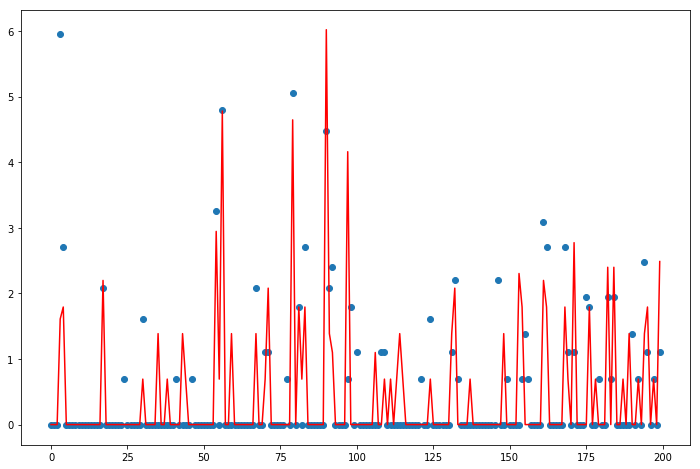

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl

x = np.arange(200)
mpl.rcParams['figure.figsize'] = (12, 8)

plt.scatter(x, y_test[:200])
plt.plot(x, y_pred[:200], color='red')
plt.show()